In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
df = pd.read_csv('bank_data.csv')
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [3]:
df1 = df['recovery_strategy'].unique()
df_1 = pd.DataFrame(df1)
df_1

,0
0,Level 0 Recovery
1,Level 1 Recovery
2,Level 2 Recovery
3,Level 3 Recovery
4,Level 4 Recovery


In [4]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

id                            int64
expected_recovery_amount      int64
actual_recovery_amount      float64
recovery_strategy            object
age                           int64
sex                          object
dtype: object

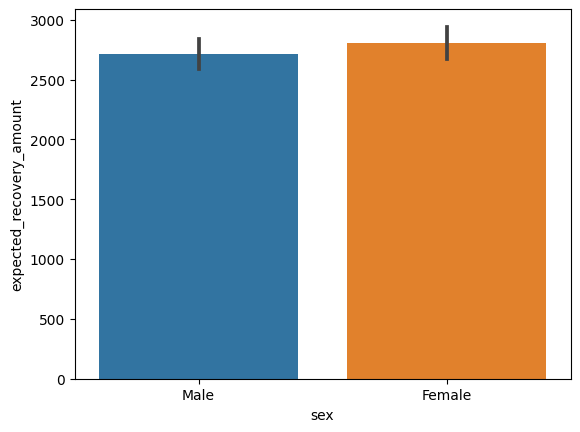

In [7]:
sns.barplot(x='sex',y='expected_recovery_amount',data=df)
plt.show()

* Both the male and female have the expected recovery amount in the same range

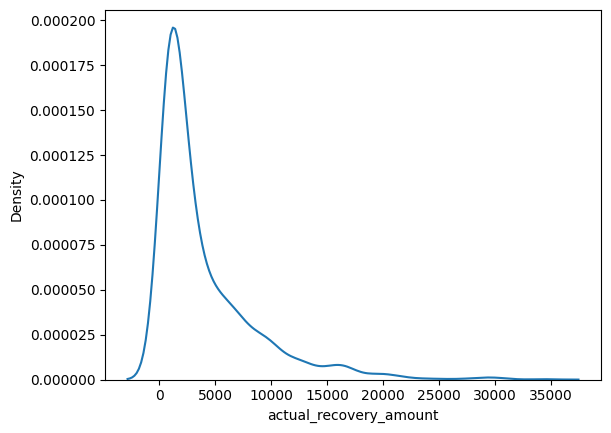

In [8]:
sns.kdeplot(df['actual_recovery_amount'])
plt.show() 

* Most of the actual recovery amount lies in between the range of 0 - 5000

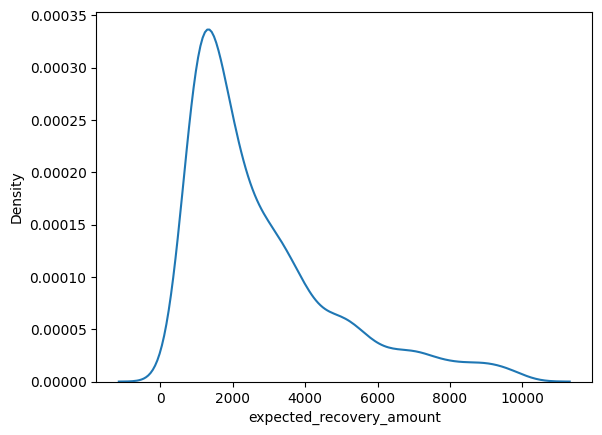

In [9]:
sns.kdeplot(df['expected_recovery_amount'])
plt.show()

* Most of the expected recovery amount lies between 1000 - 3000

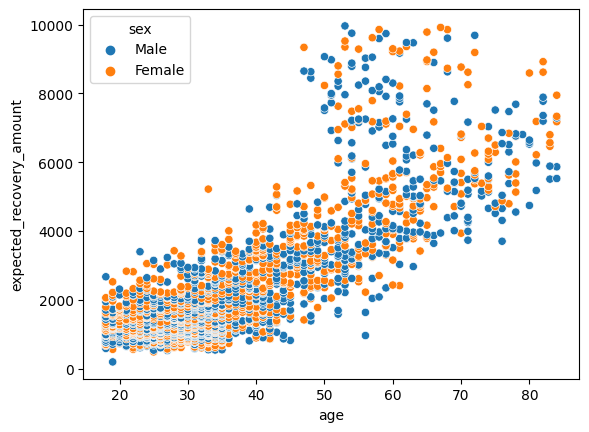

In [10]:
sns.scatterplot(data=df,x='age',y='expected_recovery_amount',hue='sex')
plt.show()

* From the above graph its clear that the elder people are having the highest expected recovery amount

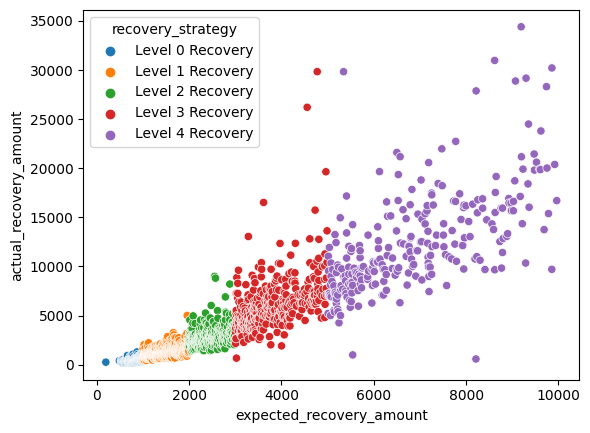

In [11]:
sns.scatterplot(data=df,x='expected_recovery_amount',y='actual_recovery_amount',hue='recovery_strategy')
plt.show()

* The above graph shows the different recovery strategy and their recovery amount range

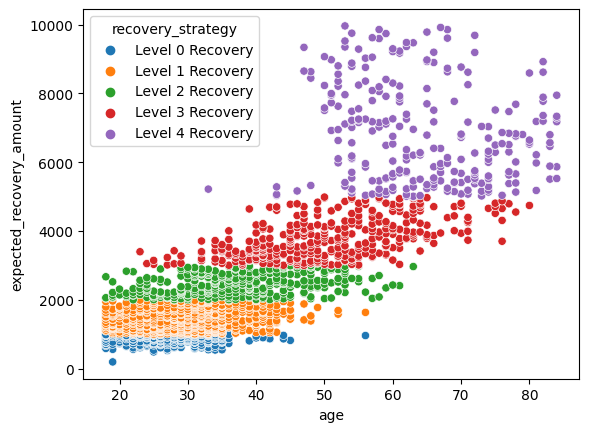

In [12]:
sns.scatterplot(data=df,x='age',y='expected_recovery_amount',hue='recovery_strategy')
plt.show()

* The above graph shows the range of expected recovery amount and the age along with different recovery strategy

In [14]:
df1 = df[df['expected_recovery_amount']>900]

In [15]:
df1 = df1[df1['expected_recovery_amount']<1100]


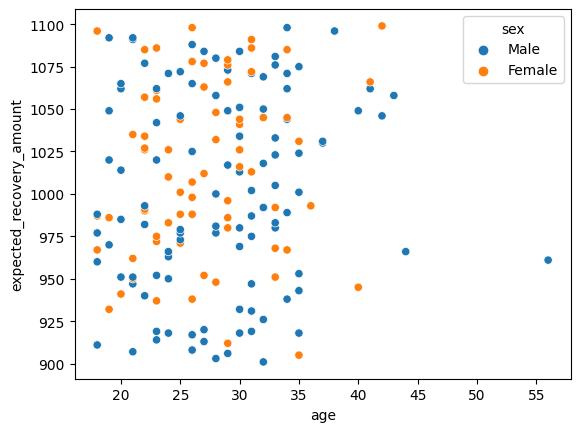

In [16]:
sns.scatterplot(data=df1,y='expected_recovery_amount',x='age',hue='sex')
plt.show()

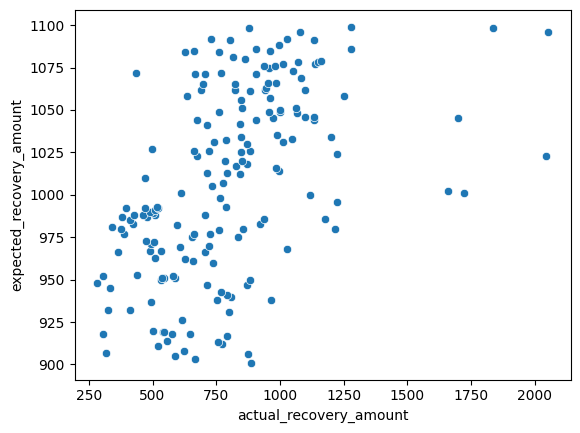

In [17]:
sns.scatterplot(data=df1,y='expected_recovery_amount',x='actual_recovery_amount')
plt.show()

# Graphical Exploratory Data Analysis
## Statistical test: age vs. expected recovery amount

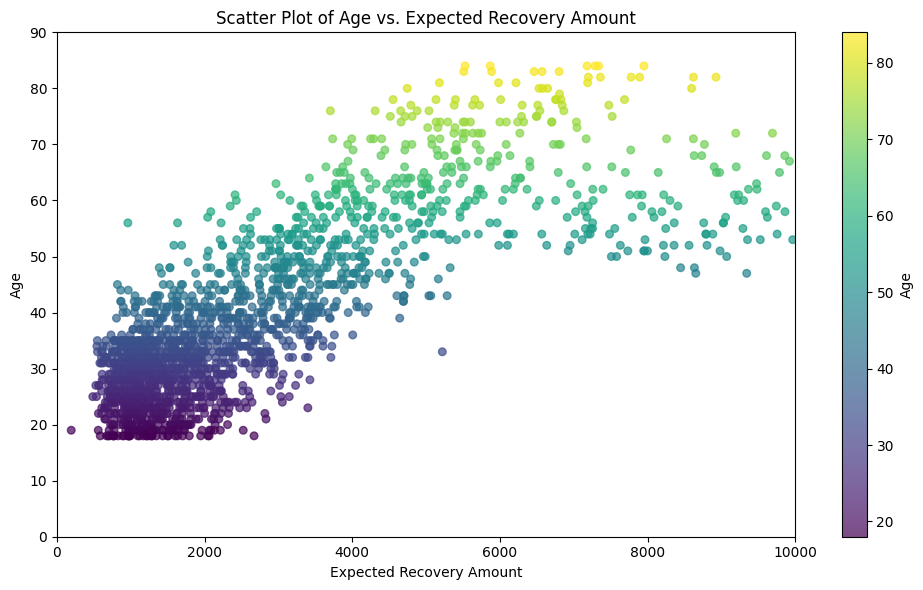

In [19]:
# Set up a custom color palette
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=df['expected_recovery_amount'], y=df['age'], c=df['age'], cmap='viridis', s=30, alpha=0.7)
plt.xlim(0, 10000)
plt.ylim(0, 90)

cbar = plt.colorbar(scatter)
cbar.set_label("Age")

plt.xlabel("Expected Recovery Amount")
plt.ylabel("Age")
plt.title("Scatter Plot of Age vs. Expected Recovery Amount")

plt.tight_layout()
plt.show()



## Statistical test: age vs. expected recovery amount


In [20]:
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) & 
                      (df['expected_recovery_amount']>=900)]
# Define Level_0_age and Level_1_age
Level_0_age = era_900_1100.loc[df['recovery_strategy'] == "Level 0 Recovery"]['age']
Level_1_age = era_900_1100.loc[df['recovery_strategy'] == "Level 1 Recovery"]['age']

statistic, p_value = stats.kruskal(Level_0_age, Level_1_age)

print("Kruskal-Wallis Test:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")


Kruskal-Wallis Test:
Test Statistic: 3.4572342749517513
P-value: 0.06297556896097407


## Statistical test: sex vs. expected recovery amount
###  Perform chi-square test

In [21]:
filtered_data = df[(df['expected_recovery_amount'] < 1100) & (df['expected_recovery_amount'] >= 900)]

crosstab = pd.crosstab(filtered_data['recovery_strategy'], filtered_data['sex'])

print(crosstab)

# Perform chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55
Chi-square statistic: 0.3796422112341753
P-value: 0.5377947810444592


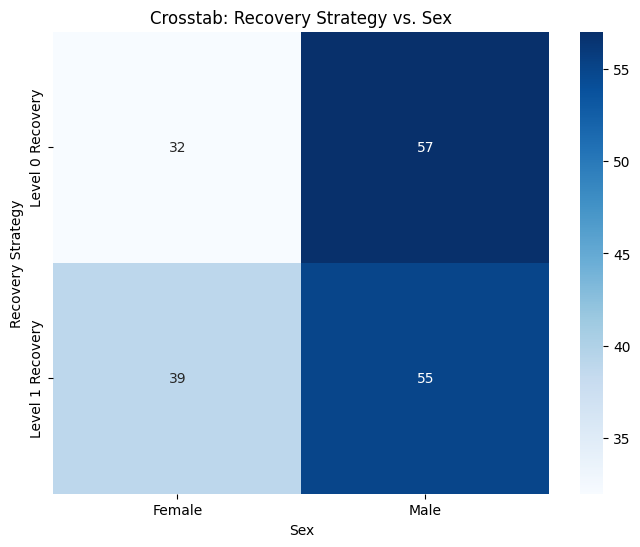

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.title("Crosstab: Recovery Strategy vs. Sex")
plt.xlabel("Sex")
plt.ylabel("Recovery Strategy")
plt.show()

## Exploratory graphical analysis: recovery amount

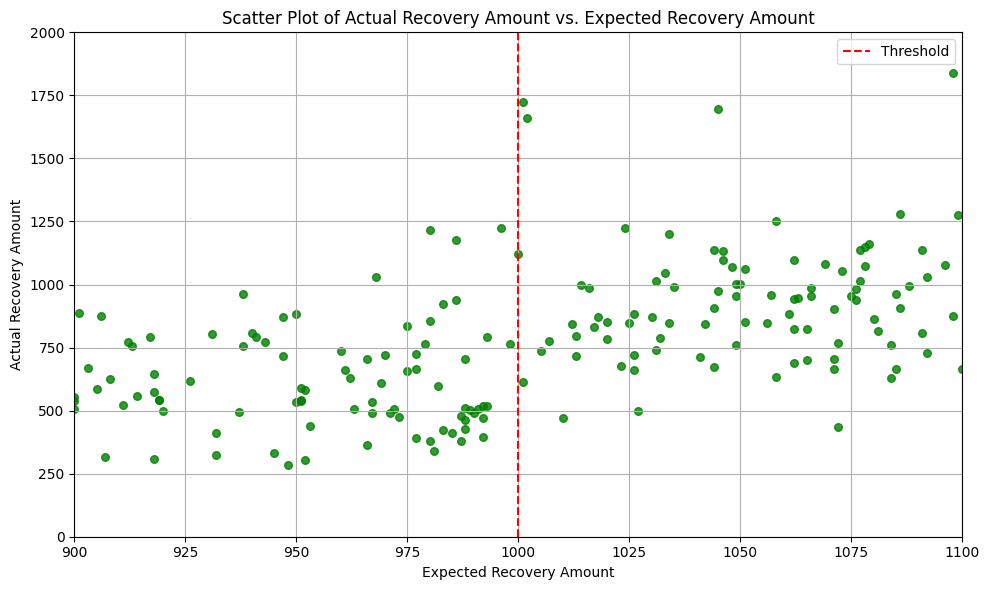

In [24]:

plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(x=df['expected_recovery_amount'], y=df['actual_recovery_amount'], c="g", s=30, alpha=0.8)
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Scatter Plot of Actual Recovery Amount vs. Expected Recovery Amount")
plt.legend(["Data"], loc=2)  # Add legend
plt.axvline(x=1000, color='r', linestyle='--', label="Threshold")  # Add vertical line for the threshold
plt.legend()
plt.grid(True)  # Add grid lines for better readability

# Show the plot
plt.tight_layout()
plt.show()


# Regression modeling: no threshold

In [25]:
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Sun, 27 Aug 2023   Prob (F-statistic):           1.56e-13
Time:                            18:17:34   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression line along with the data points

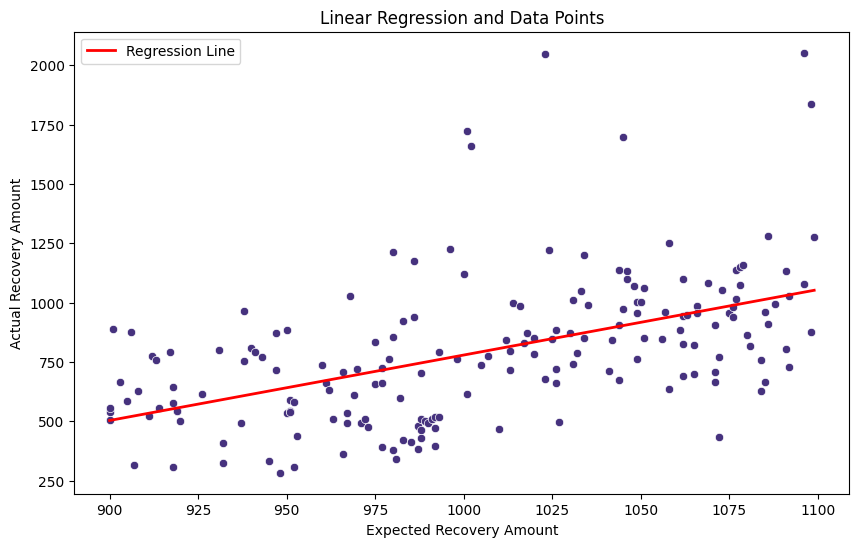

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=era_900_1100)
plt.plot(era_900_1100['expected_recovery_amount'], predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Linear Regression and Data Points")
plt.legend()
plt.show()

# Regression modeling: adding true threshold


In [27]:
#Create indicator (0 or 1) for expected recovery amount >= $1000
df['indicator_1000'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) & 
                      (df['expected_recovery_amount']>=900)]

# Define X and y
X = era_900_1100[['expected_recovery_amount','indicator_1000']]
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Sun, 27 Aug 2023   Prob (F-statistic):           1.83e-15
Time:                            18:19:01   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression line along with the data points

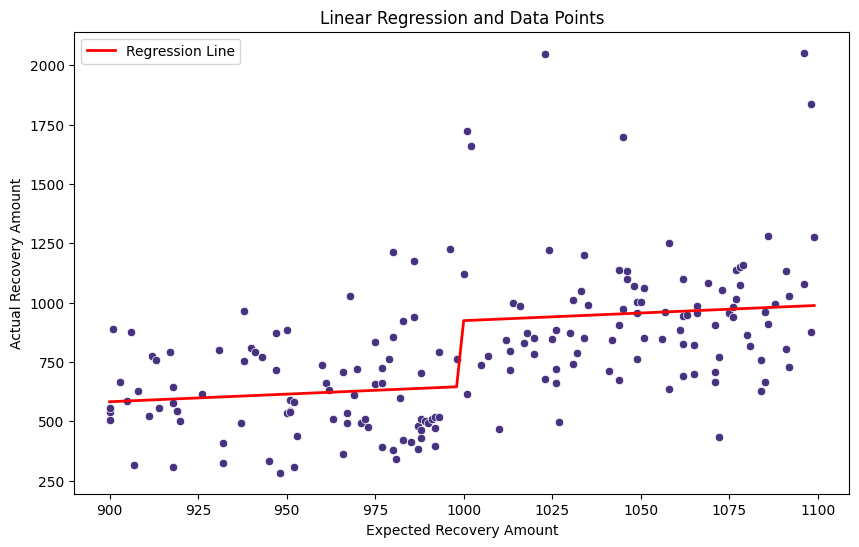

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=era_900_1100)
plt.plot(era_900_1100['expected_recovery_amount'], model.fittedvalues, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Linear Regression and Data Points")
plt.legend()
plt.show()

# Regression modeling: adjusting the window

In [29]:
# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = df.loc[(df['expected_recovery_amount']<1050) & 
                      (df['expected_recovery_amount']>=950)]

# Define X and y 
X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Sun, 27 Aug 2023   Prob (F-statistic):           1.12e-07
Time:                            18:20:55   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression line along with the data points

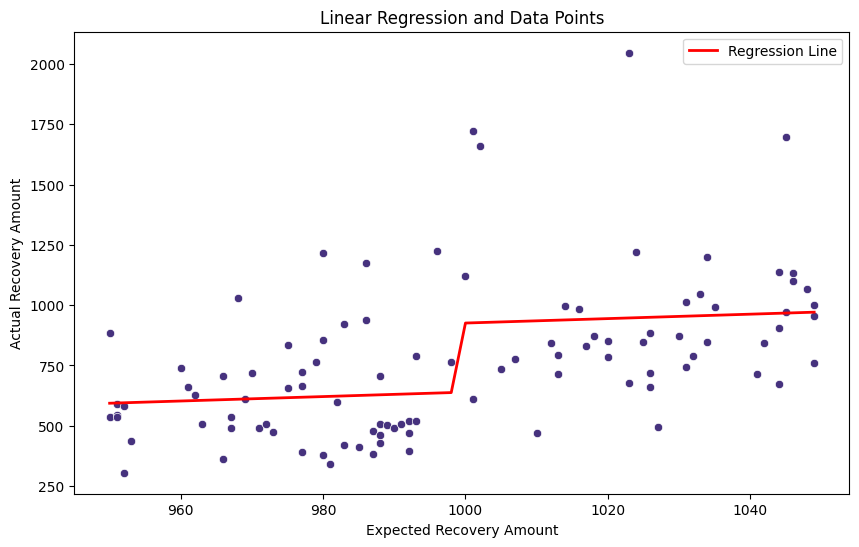

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=era_950_1050)
plt.plot(era_950_1050['expected_recovery_amount'], model.fittedvalues, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Linear Regression and Data Points")
plt.legend()
plt.show()